In [1]:
import pandas as pd

df = pd.read_parquet("../data/dataframe.br.parq", engine="pyarrow")

### Set global vars

In [2]:
from collections import namedtuple

ACTIVITY_PERIODS = [30,14,7,3,1]
GAMES = ["aoe2", "aoe3", "aoe4"]

# Mask for only having the last timestamp
LAST_TIMESTAMP = df['timestamp'] == df['timestamp'].max()

# Activity periods
ACTIVITY_PERIOD_FILTERS = {}
for activity_period in ACTIVITY_PERIODS:
    ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"] = (df[LAST_TIMESTAMP]['timestamp']-df['last_match']) < pd.Timedelta(activity_period, "d")

LeaderboardSetting = namedtuple(
    "LeaderboardSetting", "game leaderboard legend url bit_mask"
)
leaderboard_settings = [
    LeaderboardSetting(
        "aoe2",
        "rm",
        "AoE2:DE RM",
        "https://aoe2.net/leaderboard/aoe2de/rm-1v1?draw=1&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b1,
    ),
    LeaderboardSetting(
        "aoe2",
        "team_rm",
        "AoE2:DE Team-RM",
        "https://aoe2.net/leaderboard/aoe2de/rm-team?draw=2&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b10,
    ),
    LeaderboardSetting(
        "aoe2",
        "ew",
        "AoE2:DE EW",
        "https://aoe2.net/leaderboard/aoe2de/ew-1v1?draw=4&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b100,
    ),
    LeaderboardSetting(
        "aoe2",
        "team_ew",
        "AoE2:DE Team-EW",
        "https://aoe2.net/leaderboard/aoe2de/ew-team?draw=3&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b1000,
    ),
    LeaderboardSetting(
        "aoe2",
        "unranked",
        "AoE2:DE Unranked",
        "https://aoe2.net/leaderboard/aoe2de/unranked?draw=5&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b10000,
    ),
    LeaderboardSetting(
        "aoe3",
        "supremacy_1v1",
        "AoE3:DE Supremacy 1v1",
        "https://aoe3.net/leaderboard/aoe3de/supremacy-1v1?draw=1&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b100000,
    ),
    LeaderboardSetting(
        "aoe3",
        "supremacy_team",
        "AoE3:DE Supremacy Team",
        "https://aoe3.net/leaderboard/aoe3de/supremacy-team?draw=2&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b1000000,
    ),
    LeaderboardSetting(
        "aoe3",
        "treaty",
        "AoE3:DE Treaty",
        "https://aoe3.net/leaderboard/aoe3de/treaty?draw=3&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b10000000,
    ),
    LeaderboardSetting(
        "aoe3",
        "deathmatch",
        "AoE3:DE Deathmatch",
        "https://aoe3.net/leaderboard/aoe3de/deathmatch?draw=4&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b100000000,
    ),
    LeaderboardSetting(
        "aoe4",
        "custom",
        "AoE4 Custom",
        "https://aoeiv.net/leaderboard/aoe4/custom?draw=2&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b1000000000,
    ),
    LeaderboardSetting(
        "aoe4",
        "qm_1v1",
        "AoE4 QM-1v1",
        "https://aoeiv.net/leaderboard/aoe4/qm-1v1?draw=1&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b10000000000,
    ),
    LeaderboardSetting(
        "aoe4",
        "qm_2v2",
        "AoE4 QM-2v2",
        "https://aoeiv.net/leaderboard/aoe4/qm-2v2?draw=3&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b100000000000,
    ),
    LeaderboardSetting(
        "aoe4",
        "qm_3v3",
        "AoE4 QM-3v3",
        "https://aoeiv.net/leaderboard/aoe4/qm-3v3?draw=4&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b1000000000000,
    ),
    LeaderboardSetting(
        "aoe4",
        "qm_4v4",
        "AoE4 QM-4v4",
        "https://aoeiv.net/leaderboard/aoe4/qm-4v4?draw=5&columns[0][data]=&columns[0][name]=&columns[0][searchable]=false&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=&columns[1][name]=&columns[1][searchable]=false&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=&columns[3][name]=&columns[3][searchable]=false&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=&columns[4][name]=&columns[4][searchable]=false&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=&columns[5][name]=&columns[5][searchable]=false&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=&columns[6][name]=&columns[6][searchable]=false&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&columns[7][data]=&columns[7][name]=&columns[7][searchable]=false&columns[7][orderable]=true&columns[7][search][value]=&columns[7][search][regex]=false&order[0][column]=0&order[0][dir]=asc&search[value]=&search[regex]=false",
        0b10000000000000,
    ),
]

### Some information about the data

In [3]:
df.columns

Index(['timestamp', 'game', 'leaderboard', 'steam_id', 'profile_id', 'rank',
       'rating', 'highest_rating', 'previous_rating', 'country_code', 'name',
       'known_name', 'num_games', 'streak', 'num_wins', 'win_percent',
       'rating24h', 'games24h', 'wins24h', 'last_match'],
      dtype='object')

In [4]:
# DF size
df.shape

(3095295, 20)

### Actual work

#### Playerbase for games from last timestamp

We first need the size of the playerbases of the games and leaderboards to get percentages for the countries

In [12]:
# player base size for activity of games 
collector = {}

# TODO: because each profile ID can be active on more than one leaderboard,
# we need to groupby the profile_id here

for activity_period in ACTIVITY_PERIODS:
    collector[f"{activity_period}d"] = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]].groupby(["profile_id", "game"], as_index=False).size()

print(collector)


{'30d':                                                profile_id  game  size
0       b'\x00\x00-\xcce\xf2\x89\xccX\xd9/vT-\x8b\n\xb...  aoe2     1
1       b'\x00\x00[`\xf9\xb6]\x833\xf7\xcad\x12+\xa0B\...  aoe4     1
2       b'\x00\x00\xb7@`\xaf\x9e\xb1O\x06\xb6\x92\xd5U...  aoe4     4
3       b'\x00\x00\xbc\xf4\xde\xfft\x1e\xd2\x95Q\xf0\x...  aoe2     1
4       b'\x00\x00\xc7\xeb\x11|\x81\xb5\xf4\x99\xdc6\x...  aoe4     4
...                                                   ...   ...   ...
367908  b'\xff\xfff\x85\xf3\xd9V(W\xb0\xf4\x00$R\xdfh\...  aoe2     1
367909  b'\xff\xff\xaa\x91\x9fL\xecLN\x8bbx\xeaF\xc8\x...  aoe2     1
367910  b'\xff\xff\xbcF\x9bJ\x00/\xbc]\r\xee\x86\xd4\x...  aoe2     3
367911  b'\xff\xff\xbcF\x9bJ\x00/\xbc]\r\xee\x86\xd4\x...  aoe4     1
367912  b'\xff\xff\xf0\t\xc9\xbf1\x01R1]\x93\x84\xf5\x...  aoe2     1

[367913 rows x 3 columns], '14d':                                                profile_id  game  size
0       b'\x00\x00[`\xf9\xb6]\x833\xf7\xcad\x12

{'30d': game  leaderboard   
aoe2  ew                  1813
      rm                 40045
      team_ew             2433
      team_rm            65119
      unranked           89532
aoe3  deathmatch            23
      supremacy_1v1       2987
      supremacy_team      2885
      treaty               613
aoe4  custom            130579
      qm_1v1             43623
      qm_2v2             56827
      qm_3v3             52807
      qm_4v4             44735
dtype: int64, '14d': game  leaderboard   
aoe2  ew                 1312
      rm                31559
      team_ew            1785
      team_rm           52778
aoe3  deathmatch           20
      supremacy_1v1      2250
      supremacy_team     2172
      treaty              475
aoe4  custom            90029
      qm_1v1            32358
      qm_2v2            41958
      qm_3v3            39533
      qm_4v4            33648
dtype: int64, '7d': game  leaderboard   
aoe2  ew                  957
      rm                24417
    

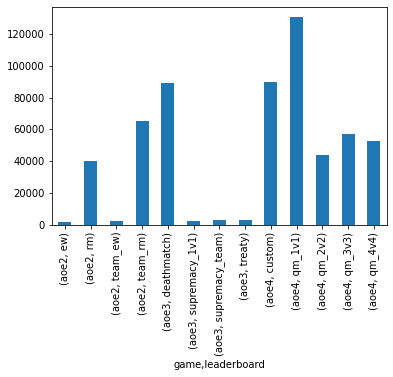

In [21]:
# player base size for activity of leaderboards
# NOTE: because each profile ID can only be active once on a leaderboard,
# we don't need to groupby the profile_id here
collector = {}

for activity_period in ACTIVITY_PERIODS:
    collector[f"{activity_period}d"] = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]].groupby(["game", "leaderboard"]).size()
#     collector[f"{activity_period}d"].plot.bar()

print(collector)

TODO: use https://pandas.pydata.org/pandas-docs/version/1.4.0/reference/api/pandas.DataFrame.apply.html to convert to percentage

In [49]:
# Countries overall the games // aoe3 and aoe2 don't have them set as much

collector = {}

# TODO: because each profile ID can be active on more than one leaderboard,
# we need to groupby the profile_id here

for activity_period in ACTIVITY_PERIODS:
    collector[f"{activity_period}d"] = df.loc[[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]], "profile_id"].groupby(["profile_id", "game", "country_code"]).count()

collector["30d"]

KeyError: "None of [Index([(False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, ...)], dtype='object')] are in the [index]"

In [25]:
# Countries of player_ids // aoe3 and aoe2 don't have them set as much

collector = {}

# TODO: because each profile ID can be active on more than one leaderboard,
# we need to groupby the profile_id here

for activity_period in ACTIVITY_PERIODS:
    collector[f"{activity_period}d"] = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]].groupby(["profile_id", "country_code"]).size()

print(collector)

{'30d': profile_id                                                                                      country_code
b'\x00\x00-\xcce\xf2\x89\xccX\xd9/vT-\x8b\n\xb0\x0e^\xf9\xdf\x98\xa59\xc8.\xaa\x0b'             GB              1
b'\x00\x00[`\xf9\xb6]\x833\xf7\xcad\x12+\xa0B\xa5\xfa\xbc\x93\x18\x9a\x9a\xb6[@\xfc\x98'        US              1
b'\x00\x00\xbc\xf4\xde\xfft\x1e\xd2\x95Q\xf0\xae\xcae\xfe$ \xb5\xd9Y\x97\xc1}\x9by\x90\xea'     TW              1
b'\x00\x00\xed\x85\xce\x9dV\xbf\xee\xf7]c\xc5\xe2o-m\xb7\x0cS\x19\xad\xab\xb5\x07\xad5a'        DE              1
b'\x00\x01\x05\x90q\x00\xed\x81\xa8\x8c\xf9\xd3\xd96^\xb0\xe5\x04\xed\x1dR\x07.[\xea\xccW\xe7'  MX              3
                                                                                                               ..
b'\xff\xfe\x1b\xd0\xb3\xa4\t\xa7\x9d\x86\xb1\x8be<\x1b\x8a\n\x00C\xcd5<{\xafZ\x85\xeaT'         CN              1
b'\xff\xfe\x9f\x86\xe2\xd2\xad\x8a\xd6\xab\\4\x14g\xb0X\x0c\x04p\x95\xd5dS\x10\xd9+`\

In [42]:
# Countries overall the leaderboards // aoe3 and aoe2 don't have them set as much
collector = {}

# NOTE: because each profile ID can only be active once on a leaderboard,
# we don't need to groupby the profile_id here

for activity_period in ACTIVITY_PERIODS:
#     dat = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]].groupby(["game", "leaderboard", "country_code"], as_index=False)
    collector[f"{activity_period}d"] = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"]].groupby(["game", "leaderboard", "country_code"]).size()
    collector[f"{activity_period}d"] 
#     dat_with_size = pd.merge(
#         left= dat,
#         right=dat_size,
#         on= ["game", "leaderboard", "country_code"]
#     )
#     dat_with_size.sort_values(
#         by=["size", "profile"],
#         ascending=False
#     ).head(3)
#      = dat_with_size
    
print(collector["30d"])

collector["30d"] = collector["30d"].apply(lambda x: x * 3)
collector["30d"]

game  leaderboard  country_code
aoe2  ew           AL                3
                   AR              150
                   AT               11
                   AU               60
                   BD                1
                                  ... 
aoe4  qm_4v4       VA                7
                   VE                1
                   VN               17
                   ZA               30
                   ZM                1
Length: 1383, dtype: int64


game  leaderboard  country_code
aoe2  ew           AL                9
                   AR              450
                   AT               33
                   AU              180
                   BD                3
                                  ... 
aoe4  qm_4v4       VA               21
                   VE                3
                   VN               51
                   ZA               90
                   ZM                3
Length: 1383, dtype: int64

#### Platform data

In [29]:
# Platforms overall the leaderboards with activity
collector = {}

is_relic = df['steam_id'].isnull()


for activity_period in ACTIVITY_PERIODS:
    collector[f"{activity_period}d"] = df.loc[LAST_TIMESTAMP & ACTIVITY_PERIOD_FILTERS[f"{activity_period}d"] & is_relic].groupby(["game", "leaderboard", "profile_id"]).size()

print(collector)


{'30d': game  leaderboard  profile_id                                                                                    
aoe2  ew           b'\x04\x86\x06N\x12\xd0g\xb5\x89\xf0\x87\xf1\xfc\xff\xb7#,\xa5S\xd5\xfe\xb0\xef\xc7\xb0$\xe3@'    1
                   b'\x07=\x11\x18G&5\rYi\xfb\xfe\xf0\x01\xca\xebE\xc4\x1fW5)\x95g}\x13o\xf8'                        1
                   b'\x08\x0c\x1b3\x9c\xbf\xd0\x9ck\x95Ct\x87\xafj\x129\xf3A\xfc\x83\x0b\x99\xfa\xa9\xca\xdf\x87'    1
                   b'\x08U;\xe88\xbcK\x92\x99\xfbC\xd8\xf6\xc1O\x9c\x96\x1c\x92\xc7\xb5\xac\xa2\x8e9\xce:['          1
                   b'\n\xb7\x8b\x8e\x14\x97sW\xccB\xad\x9d\x06c \xce\xc2\x8d\xa1.I\xdb\x8d\xf2\xfaq\xbe\x93'         1
                                                                                                                    ..
aoe4  qm_4v4       b'\xff\xd8g+\x95\x1b\xbb\xd0\x04\x1b\x87z>\xa8\xcf\x0bR~\x10\xcb\xa4t\xe34\xbe\x8a\xe9\x95'       1
                   b'\xff\xdb\x92\xf2k\xa2\x1